# Essential packages

The following packages are your bread and butter. We show some important functionalities here. 

## Numpy

For array manipulations, linear algebra, interpolation and basic statistics.

In [2]:
import numpy as np

### Define arrays

In [3]:
# Using np.array() to create from a list
arr1 = np.array([1, 2, 3, 4, 5])

# Using np.arange() to create sequential array
arr2 = np.arange(0, 10, 2)  # Creates [0, 2, 4, 6, 8]

# Using np.zeros() and np.ones() with specific data types
arr3 = np.zeros(5, dtype=np.int32)  # Creates [0, 0, 0, 0, 0]
arr4 = np.ones(3, dtype=np.float64)  # Creates [1., 1., 1.]

# Creating arrays with specific data types
arr5 = np.array([1, 2, 3], dtype=np.float32)  # 32-bit floating point
arr6 = np.array([True, False, True], dtype=np.bool_)  # Boolean
arr7 = np.array(['a', 'b', 'c'], dtype=str)  # String array

# Creating 2D arrays with specific types
arr8 = np.zeros((2, 3), dtype=np.complex128)  # 2x3 array of complex numbers
arr9 = np.ones((3, 2), dtype=np.uint8)  # 3x2 array of unsigned 8-bit integers



In [4]:
arr9

array([[1, 1],
       [1, 1],
       [1, 1]], dtype=uint8)

### Operate on arrays

In [5]:
# Basic arithmetic operations (vectorized)
a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

# Element-wise operations
sum_arr = a + b  # [11, 22, 33, 44]
diff_arr = b - a  # [9, 18, 27, 36] 
prod_arr = a * b  # [10, 40, 90, 160]
div_arr = b / a  # [10., 10., 10., 10.]

# Broadcasting with scalars
scaled = a * 2  # [2, 4, 6, 8]
offset = a + 100  # [101, 102, 103, 104]

# Mathematical functions
squares = np.square(a)  # [1, 4, 9, 16]
sqrt = np.sqrt(a)  # [1., 1.41421356, 1.73205081, 2.]
exp = np.exp(a)  # [2.71828183, 7.3890561, 20.08553692, 54.59815003]

# Aggregation operations
total = np.sum(a)  # 10
mean = np.mean(a)  # 2.5
maximum = np.max(a)  # 4
minimum = np.min(a)  # 1

# Boolean operations
mask = a > 2  # [False, False, True, True]
filtered = a[mask]  # [3, 4]


In [6]:
# np.where example - returns indices where condition is met
arr = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])

# Find indices where array is greater than 3
indices = np.where(arr > 3)  # Returns (array([3, 4, 5]),)

# Can also use where as a conditional selector
result = np.where(arr > 3, arr, 0)  # Replace values <= 3 with 0
# result: [0, 0, 0, 4, 5, 4, 0, 0, 0]


In [12]:
# Broadcasting example: Temperature conversion for multiple cities
# Suppose we have daily temperatures for 3 cities over 4 days in Celsius
temps_celsius = np.array([
    [20, 22, 21, 23],  # City 1
    [25, 24, 26, 25],  # City 2
    [18, 19, 17, 20]   # City 3
])

# To convert to Fahrenheit, we need to multiply by 9/5 and add 32
# Broadcasting allows us to perform this operation on the entire array at once
temps_fahrenheit = (temps_celsius * 9/5) + 32

print("Temperatures in Celsius:")
print(temps_celsius)
print("\nTemperatures in Fahrenheit:")
print(temps_fahrenheit)


Temperatures in Celsius:
[[20 22 21 23]
 [25 24 26 25]
 [18 19 17 20]]

Temperatures in Fahrenheit:
[[68.  71.6 69.8 73.4]
 [77.  75.2 78.8 77. ]
 [64.4 66.2 62.6 68. ]]


In [17]:

# We can also calculate daily temperature deviations from each city's mean
city_means = np.mean(temps_celsius, axis=1, keepdims=True)  # Shape: (3,1)
print("\nCity means:")
print(city_means)



City means:
[[21.5]
 [25. ]
 [18.5]]


In [10]:
# Broadcasting automatically expands city_means to match temps_celsius shape
temp_deviations = temps_celsius - city_means

print("\nTemperature deviations from city means:")
print(temp_deviations)


Temperature deviations from city means:
[[-1.5  0.5 -0.5  1.5]
 [ 0.  -1.   1.   0. ]
 [-0.5  0.5 -1.5  1.5]]


### Array shapes

If an array `A` has a shape `(m, n)`:

- `m` represents the number of rows.
- `n` represents the number of columns.

For example:


In [11]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
print(A.shape) 


(2, 3)


For higher-dimensional arrays, the shape follows a similar convention, going from outer to inner dimensions:

- In a 3D array, `(depth, rows, columns)`, the first dimension (depth) can represent layers or "pages."
- In a 4D array, it would be `(batch, depth, rows, columns)`, commonly seen in applications like image processing or deep learning.


### Newaxis

Using `np.newaxis` (or `None` indexing) allows you to reshape arrays to match a required format.

For instance, suppose you have a **grayscale image** as a 2D array, where each element represents the brightness of a pixel. Let’s say it’s a 3x4 image:

In [1]:
import numpy as np

image = np.array([
    [200, 202, 198, 205],
    [197, 203, 204, 200],
    [195, 202, 201, 199]
])  

image.shape


(3, 4)

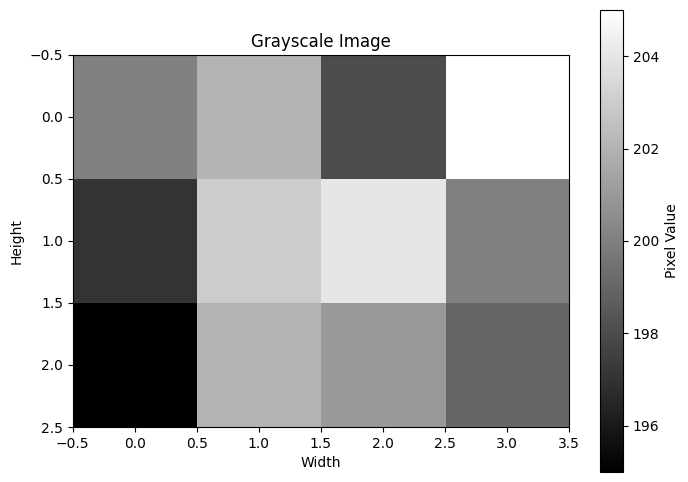

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.colorbar(label='Pixel Value')
plt.title('Grayscale Image')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()



The shape `(3, 4)` means the image has 3 rows (height) and 4 columns (width). 


Say that in our PyTorch ML project we have adopted the convention that the first dimension is the channel dimension (which is the Pytorch convention for image processing). So we would want to add a **channel** dimension as the first dimension to reshape this original `(3, 4)` image into a `(1, 3, 4)` grayscale image.


We can use `np.newaxis` to add this extra dimension in NumPy before converting to a PyTorch tensor:


In [3]:
image_3d = image[np.newaxis, :, :]
print(image_3d.shape)  # Output: (1, 3, 4)

(1, 3, 4)


Now, the shape `(1, 3, 4)` represents:
- **1 channel** (indicating grayscale),
- **3 rows** (height of the image),
- **4 columns** (width of the image).



Finally, you can convert this NumPy array to a PyTorch tensor and get going with our ML stuff:

In [4]:
import torch

image_tensor = torch.from_numpy(image_3d)
print(image_tensor.shape)  # Output: torch.Size([1, 3, 4])


torch.Size([1, 3, 4])






## Scipy 


## Pandas 


## Scikit-learn


## Matplotlib


## Seaborn